In [1]:
# импорт всего, что нам понадобится
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [2]:
# считываем данные
df = pd.read_csv("data/dry_bean_dataset/Dry_Bean_Dataset.csv", sep = ";",decimal =",")
df.head

<bound method NDFrame.head of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  r

In [4]:
def data_overview(df, head=5):
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)


------------------------------------------------------- MISSING VALUES ------------------------------------------------------
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
68
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidi

In [14]:
m_dict = {
    "Class":{"SEKER":0, "BARBUNYA":1, "BOMBAY":2, "CALI":3, "HOROZ":4, "SIRA":5, "DERMASON":6} 
}

df = df.replace(m_dict)
df.head

<bound method NDFrame.head of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  r

In [15]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [16]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,6


In [17]:
df.shape

(13611, 17)

In [18]:
# кол-во элементов для тестовой выборки
test_split_number=round(len(df)*0.25)
test_split_number

3403

In [19]:
# разбиваем на тест и трейн
df_for_training=df[:-test_split_number]
df_for_testing=df[-test_split_number:]


print(df_for_training.shape)
print(df_for_testing.shape)

(10208, 17)
(3403, 17)


In [20]:
# когда данные смотрели, было видно, что они не нормированные. Нормируем.
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [21]:
df_for_training_scaled

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.75099637, 0.98061988,
        0.        ],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.88498696, 0.97497943,
        0.        ],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.7361995 , 0.98719586,
        0.        ],
       ...,
       [0.01683633, 0.03289599, 0.05176047, ..., 0.49188357, 0.96321342,
        1.        ],
       [0.01686621, 0.03116455, 0.04749427, ..., 0.51989895, 0.96551814,
        1.        ],
       [0.01688329, 0.03854833, 0.0563011 , ..., 0.46398387, 0.94031526,
        1.        ]])

In [22]:
df_for_training_scaled.shape

(10208, 17)

In [23]:
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_testing_scaled.shape

(3403, 17)

In [24]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY) 

In [25]:
n_past = 50 # сколько точек будет предсказывать

trainX,trainY=createXY(df_for_training_scaled,n_past)

testX,testY=createXY(df_for_testing_scaled,n_past)

In [26]:
trainX.shape

(10158, 50, 17)

In [27]:
testX.shape

(3353, 50, 17)

In [28]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [31]:
# собираем lstm-ку
def build_model(optimizer="adam", npas = n_past, icol = 17):
    grid_model = Sequential()
    grid_model.add(LSTM(20 + n_past,return_sequences=True,input_shape=(n_past,icol)))
    grid_model.add(LSTM(20 + n_past))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(model=build_model,verbose=1, fit__validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [33]:
# Обучение происхлдит один раз
model_fitted = grid_model.fit(trainX,trainY,epochs=8)

Epoch 1/8
318/318 [==============================] - 18s 38ms/step - loss: 0.0018 - val_loss: 9.3104e-06
Epoch 2/8
318/318 [==============================] - 11s 33ms/step - loss: 6.5979e-04 - val_loss: 7.2215e-06
Epoch 3/8
318/318 [==============================] - 11s 33ms/step - loss: 5.9765e-04 - val_loss: 8.9059e-06
Epoch 4/8
318/318 [==============================] - 10s 32ms/step - loss: 4.9642e-04 - val_loss: 3.3117e-06
Epoch 5/8
318/318 [==============================] - 10s 32ms/step - loss: 4.3278e-04 - val_loss: 2.1123e-05
Epoch 6/8
318/318 [==============================] - 10s 32ms/step - loss: 4.3899e-04 - val_loss: 7.1266e-06
Epoch 7/8
318/318 [==============================] - 10s 32ms/step - loss: 3.3158e-04 - val_loss: 3.7262e-05
Epoch 8/8
318/318 [==============================] - 11s 34ms/step - loss: 3.9089e-04 - val_loss: 9.1745e-07


In [50]:
# обучаем  и ищем новые параметры
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
318/318 [==============================] - 17s 35ms/step - loss: 0.0012 - val_loss: 7.4526e-06
Epoch 2/8
318/318 [==============================] - 9s 29ms/step - loss: 2.8252e-04 - val_loss: 2.1538e-05
Epoch 3/8
318/318 [==============================] - 10s 30ms/step - loss: 2.4515e-04 - val_loss: 1.2934e-04
Epoch 4/8
318/318 [==============================] - 10s 31ms/step - loss: 1.8659e-04 - val_loss: 8.8909e-05
Epoch 5/8
318/318 [==============================] - 11s 36ms/step - loss: 1.7049e-04 - val_loss: 7.8699e-05
Epoch 6/8
318/318 [==============================] - 11s 35ms/step - loss: 1.4678e-04 - val_loss: 1.7279e-05
Epoch 7/8
318/318 [==============================] - 11s 33ms/step - loss: 1.3821e-04 - val_loss: 5.8199e-06
Epoch 8/8
318/318 [==============================] - 4s 10ms/step
Epoch 1/8
318/318 [==============================] - 16s 38ms/step - loss: 0.0022 - val_loss: 5.2372e-05
Epoch 2/8
318/318 [==============================] - 12s 37ms/step - lo

In [51]:
# смотрим, какие параметры были лучшими

grid_search.best_params_

{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}

In [53]:
# заполняем лучшими параметрами
my_model=grid_search.best_estimator_.model
my_model

<function __main__.build_model(optimizer='adam', npas=50, icol=17)>

In [54]:
# делаем предикт по лучшим гиперпараметрам

# для одного раза
# prediction=model_fitted.predict(testX)

# для всех
prediction=grid_search.best_estimator_.predict(testX)

print(f"prediction {prediction} \n")
print(f"Prediction Shape {prediction.shape}")

210/210 [==============================] - 5s 15ms/step
prediction [0.01725321 0.01788466 0.01771727 ... 0.08786744 0.08802499 0.08802179] 

Prediction Shape (3353,)


In [42]:
#  Теперь вспоминаем, что мы отмасщтабировали значения. Нужно вернуть все назад. Но прямо сделать не получится.
# Следующий код вызовет ошибку, так как делали трансформацию на матрице, а засунуть пытаемся вектор:
scaler.inverse_transform(prediction.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (3353,1) doesn't match the broadcast shape (3353,17)

In [56]:
pred = prediction.reshape(-1, 1) # без этого никак

prediction_copies_array = np.repeat(pred,17, axis=-1)  # обманываем систему
prediction_copies_array.shape

(3353, 17)

In [57]:
# теперь будет все норм
cfs = len(df.columns)

prediction=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction_copies_array),cfs)))[:,0]
prediction

array([24460.63 , 24608.516, 24569.314, ..., 40998.203, 41035.1  ,
       41034.35 ], dtype=float32)

In [58]:
# тоже самое повторяем с истинными значениями
original_copies_array = np.repeat(testY.reshape(-1, 1),cfs, axis=-1)
original_copies_array.shape

(3353, 17)

In [59]:

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),cfs)))[:,0]

In [60]:
print(f"Pred Values-- {prediction}\n\n")
print(f"Original Values-- {original}")

Pred Values-- [24460.63  24608.516 24569.314 ... 40998.203 41035.1   41034.35 ]


Original Values-- [24873. 24880. 24887. ... 42139. 42147. 42159.]


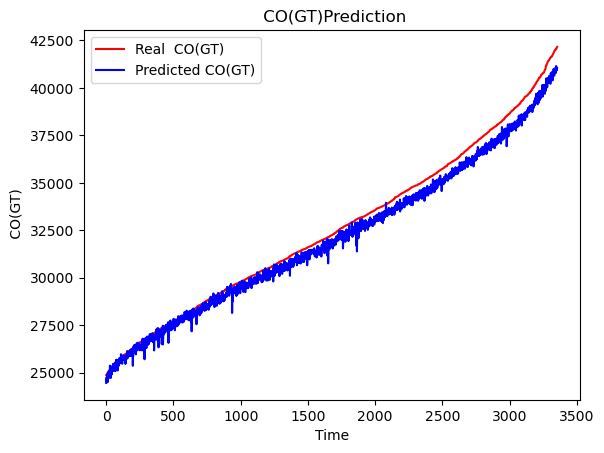

In [63]:
plt.plot(original, color = 'red', label = 'Real  CO(GT)')
plt.plot(prediction, color = 'blue', label = 'Predicted CO(GT)')
plt.title(' CO(GT)Prediction')
plt.xlabel('Time')
plt.ylabel(' CO(GT)')
plt.legend()
plt.show()